**Back Propagation**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# We will first do some experiments in numpy, no worries there will be enough tensorflow soon.

x = np.array([[0.2], [2]])
W = np.array([[-0.3, 0.8]])
y = 1

In [0]:
def multiplication(W,x):
    q = np.dot(W,x) # implement a scalar multiplication with numpy
    return q

# implement the square function : f(x,W)= || W*x ||^2  in two steps
def prediction(q):
    f_1 = q**2  
    y_pred = np.sum(f_1)   
    return y_pred

In [0]:
#implement the weight update step
def update (W, grad_W, learning_rate):
    W = W - learning_rate*grad_W
    return W

In [0]:
#implement the error and the squared error loss function
def prediction_loss(y_pred, y):
    error = y_pred-y
    loss = np.square(error)
    return loss

In [0]:
# Starting with the loss function - implement the derivative at the loss function grad_loss = df/dloss = 2*loss
def gradient_loss(y_pred, y):
    grad_loss = 2*(y_pred-y)
    return grad_loss

# Over the square operator - implement the derivative at the unit: grad_q = df/dq * grad_loss = 2*q*grad_loss
def gradient_prediction (q, grad_loss):
    grad_q = 2*q*grad_loss
    return grad_q

# Finally to the multiplication of our inputs - implement the derivative at the input: grad_W = df/dw * grad_q = x * grad_q
def gradient_multiplication (x, grad_q):
    if len(x) == 1:
        grad_W = grad_q * x.T
    else:
        grad_W = grad_q.dot(x.T)
    return grad_W

In [0]:
#Finally we bring everything together in our iterative weight update process, in our optimization routine for our neural network.
learning_rate = 1e-2

weightlist1 = []
weightlist2 = []
predictionlist = []
groundtruthlist = []

for t in range(10):
    
    weightlist1.append(W[0][0])
    weightlist2.append(W[0][1])
    
    # Forward pass
    q = multiplication(W, x)
    y_pred = prediction(q)
    loss = prediction_loss(y_pred, y)
    print("Training loss: ", loss)
    
    # Backpropagation
    grad_loss = gradient_loss(y_pred, y)
    grad_q = gradient_prediction (q, grad_loss)
    grad_W = gradient_multiplication (x, grad_q)
    W = update (W, grad_W, learning_rate)
    predictionlist.append(y_pred)
    groundtruthlist.append(y)
    print("Current prediction: ", y_pred)

Training loss:  1.8812865599999997
Current prediction:  2.3716
Training loss:  0.19077793096573217
Current prediction:  1.4367813308347006
Training loss:  0.05813516022627628
Current prediction:  1.2411123394318015
Training loss:  0.021397771751449256
Current prediction:  1.14627977218826
Training loss:  0.00859828235134978
Current prediction:  1.0927269235516297
Training loss:  0.003626927562396606
Current prediction:  1.0602239783009775
Training loss:  0.0015751203015956998
Current prediction:  1.0396877852946684
Training loss:  0.0006966633103661769
Current prediction:  1.0263943802800175
Training loss:  0.0003117777091850404
Current prediction:  1.0176572282418572
Training loss:  0.00014061053282360107
Current prediction:  1.0118579312202256


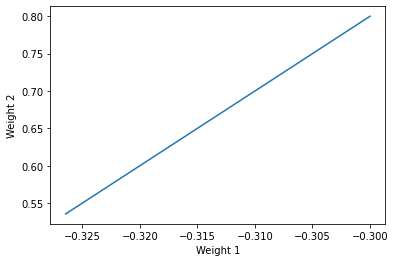

In [0]:
# How do the weights change with respect to the given input? Elaborate?

import matplotlib.pyplot as plt
plt.plot(weightlist1, weightlist2)
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.show()

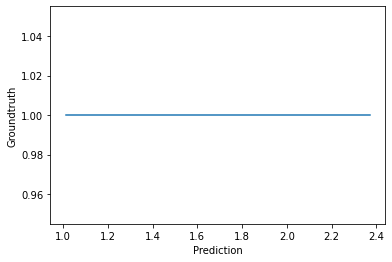

In [0]:
plt.plot(predictionlist, groundtruthlist)
plt.xlabel('Prediction')
plt.ylabel('Groundtruth')
plt.show()

**Optimization (First Steps with TensorFlow)**

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 1.x
except Exception:
  pass
  
import tensorflow as tf
import numpy as np

# For reproducability
np.random.seed(2)

TensorFlow 1.x selected.


In [0]:
# Neural Network architecture
n_input = 3
n_output = 1
n_units = 1

# Training parameters
n_updates = 20

# Define graph / network
weights = {
    'h1': tf.Variable(np.reshape([np.float32(2.0), np.float32(2.0), np.float32(2.0)], (3, 1))),
    # 'h1': tf.Variable(tf.random_normal([n_input, n_units])),
}

biases = {
    'b1': tf.Variable(np.reshape([np.float32(4.0)], (1, 1))),
    # 'b1': tf.Variable(tf.random_normal([n_units])),
}

# This is where we design our unit
def unit(x0, weights, biases):
    # unit / neuron structure
    layer_1 = tf.add(tf.matmul(tf.cast(x0, tf.float32), weights['h1']), biases['b1'])
    # activation function
    y_pred = tf.nn.relu(layer_1)
    return y_pred


# Input
x = tf.Variable(np.reshape([1.0, 1.0, 3.0], (1, 3)))
# predicted output
y_pred = unit(x, weights, biases)
# Expected output
y_gt = tf.Variable(np.reshape([10.0], (1, 1)))

In [0]:
cost = tf.losses.mean_squared_error(labels=y_gt, predictions=y_pred)

# 1. Stochastic gradient descent
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
# After 20 Updates:
# Gradient [ 7.0251474  7.0251474 21.517956 ]
# Weights: [1.9849533 1.9849533 1.9544164]
# Biases: [[3.9847324]]
# Prediction [[13.638068]]


# 2.a Momentum optimizer
# opt = tf.train.MomentumOptimizer(learning_rate=0.0001, momentum=0.75)
# After 20 Updates:
# Gradient [ 5.117397  5.117397 16.446926]
# Weights: [1.9532871 1.9532871 1.8565807]
# Biases: [[3.951654]]
# Prediction [[12.878408]]

# 2.b Momentum optimizer
# opt = tf.train.MomentumOptimizer(learning_rate=0.0001, momentum=0.9)
# After 20 Updates:
# Gradient [ 3.3781219  3.3781219 11.478415 ]
# Weights: [1.9202291 1.9202291 1.7540268]
# Biases: [[3.9169135]]
# Prediction [[12.104794]]
## Bei der gleichen Lernrate kommt der MomentumOptimizer mit dem höherem Momentum am schnellstem zum Ziel

# 3.a Adaptive momentum optimizer
# opt = tf.train.AdamOptimizer(learning_rate=0.0001)
# After 20 Updates:
# Gradient [ 7.932161  7.932161 23.828259]
# Weights: [1.9980009 1.9980009 1.9980007]
# Biases: [[3.998002]]
# Prediction [[13.976024]]
## Bei der ganz enfachen Model kann der ADAM noch nicht seine Stärke zeigen

# 3.b Adaptive momentum optimizer
# opt = tf.train.AdamOptimizer(learning_rate=0.01)
# After 20 Updates:
# Gradient [2.7061534 2.7061534 9.368019 ]
# Weights: [1.8140895 1.8140895 1.811924 ]
# Biases: [[3.8109324]]
# Prediction [[11.8545265]]
# cost 2.7737527
## Mit der höheren Lernrate kommt der ADAM natürlich schneller zum Ziel und wird zum Gewinnwer. 
## Die zu hohe Lernrate bringt mit sich aber natürlich die Gefahr  das Ziel zu überspringen und anfangen sich vom Ziel "weg zu schaukeln" (Siehe unten!!!)

# 4. Adaptive momentum optimizer with adjusted initial learning rate
opt = tf.train.AdamOptimizer(learning_rate=0.1)
# After 20 Updates:
# Gradient [1.4644433 1.4644433 5.4320855]
# Weights: [1.5981324 1.5981324 1.7860967]
# Biases: [[3.8592415]]
# Prediction [[11.129873]]
## Hier ist die Gefahr der zu hohen Lernrate veranschaulicht (Siehe Plot)


train = opt.minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Run graph
losslist = []
updatelist = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(n_updates):        
        sess.run(train)
        grad, variable = sess.run(opt.compute_gradients(cost))[0]
        
        print('Gradient', np.reshape(grad, 3))
        print('Weights:', np.reshape(sess.run(weights['h1']), 3))
        print('Biases:', sess.run(biases['b1']))
        print('Prediction', y_pred.eval())
        
        print('cost', sess.run(cost))
        print('')
        losslist.append(sess.run(cost))
        updatelist.append(i)

Gradient [ 4.913999  4.913999 15.833998]
Weights: [1.9 1.9 1.9]
Biases: [[3.9]]
Prediction [[12.83]]
cost 7.4528975

Gradient [2.503305 2.503305 8.735945]
Weights: [1.8039511 1.8039511 1.803085 ]
Biases: [[3.802702]]
Prediction [[11.755458]]
cost 2.4278622

Gradient [0.7409544 0.7409544 2.817891 ]
Weights: [1.7157449 1.7157449 1.7128251]
Biases: [[3.7115302]]
Prediction [[10.807703]]
cost 0.26960266

Gradient [-0.44467068 -0.44467068 -1.8450732 ]
Weights: [1.6392767 1.6392767 1.6337807]
Biases: [[3.6313264]]
Prediction [[10.018576]]
cost 0.12256837

Gradient [-1.1687356 -1.1687356 -5.2551713]
Weights: [1.5772022 1.5772022 1.5704294]
Biases: [[3.5674272]]
Prediction [[9.410973]]
cost 1.043668

Gradient [-1.5653564 -1.5653564 -7.5094156]
Weights: [1.5303086 1.5303086 1.5255983]
Biases: [[3.5236487]]
Prediction [[8.990318]]
cost 2.2082953

Gradient [-1.7524456 -1.7524456 -8.773108 ]
Weights: [1.497858  1.497858  1.4996396]
Biases: [[3.5007644]]
Prediction [[8.743986]]
cost 3.0809026

Grad

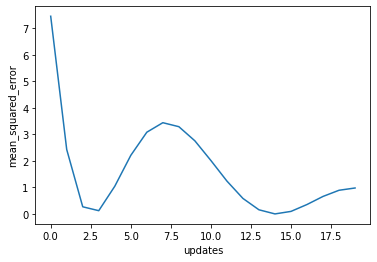

In [0]:
# How do the weights change with respect to the given input? Elaborate?

import matplotlib.pyplot as plt
plt.plot(updatelist, losslist )
plt.xlabel('updates')
plt.ylabel('mean_squared_error')
plt.show()
losslist = []
updatelist = []

**Regularization**

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),

  # Design 1. L2 Parameter norm penalty by kernel regularizer:
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),

  # Design 2. Dropout:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# Define training parameters, feel free to play with the different optimizers as well.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

In [0]:

# 3. Augmentation
# x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
# datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
#                                                                 featurewise_center=True,
#                                                                 featurewise_std_normalization=True,
#                                                                 rotation_range=20,
#                                                                 width_shift_range=0.2,
#                                                                 height_shift_range=0.2,
#                                                                 horizontal_flip=False
#                                                                 )
#
# for e in range(10):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagenerator.flow(x_train, y_train, batch_size=32):
#         model.fit(np.reshape(x_batch, (-1, 28, 28)), y_batch, shuffle=True)
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

# 4. Early stopping (usually you should monitor the validation accuracy)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                      min_delta=0,
#                                      patience=1,
#                                      mode='auto'
#                                      )
#

# Fit model on training data (with callback)
model.fit(x_train, 
          y_train, 
          epochs=20, 
          shuffle=True, 
          #callbacks=[es],
          validation_data=(x_validation, y_validation)
         )

# Fit model on training data (without augmentation)
# model.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)

# ---------------------------------------------------------------------------------------------------------------------

# without regularization "relu":
# training accuracy: 0.9921
# validation accuracy: 0.9797 :)

# without regularization "elu":
# training accuracy: 0.9861 
# validation accuracy: 0.9704 :(
    
# without regularization "leaky_relu":
# training accuracy: 0.9835 
# validation accuracy: 0.9736 :|

# L2 parameter norm penalties:
# training accuracy: 0.9445
# validation accuracy: 0.9464
# Die Accuracy ist gesunken, aber man sieht die Wirkung der Regularisation: die Trainings-Accuracy ist auch gesunken -> Gefahr der Overfitting sinkt mit

# Dropout 0.5  10 Epochen:
# training accuracy: 0.9603
# validation accuracy: 0.9763
# Die Accuracy ist gesunken, aber man sieht die Wirkung der Regularisation: die Trainings-Accuracy ist auch gesunken -> Gefahr der Overfitting sinkt mit
# Gute validation accuracy: 0.9763 -> gute Generalisierung 

# Dropout 0.5 20 Epochen:
# training accuracy: 0.9880
# validation accuracy: 0.9748
# Die Trainings-Accuracy ist wieder gestiegen -> das Netz hat gelernt mit den ausfallenden Neuronen die Zahlen besser zu erkennen

# Augmentation:
# training accuracy: 0.9697
# validation accuracy: 0.9786

# Early stopping (nach 4 Epochen):
# training accuracy: 0.9818
# validation accuracy: 0.9765

# Ergebniss: Bei einer großen Trainings DB (wie MNIST) bringt die Regularisierung zuerst eher die Senkung der Accuracy, vor allem der Trainings-Accuracy. 
# Das dient aber bei der kleineren Anzahl der Trainings-Daten zum Schutz vor Overfitting und zur Verbesserung der Generalisierung

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4468 - acc: 0.8748 - val_loss: 0.2143 - val_acc: 0.9487
Epoch 2/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2017 - acc: 0.9569 - val_loss: 0.1430 - val_acc: 0.9673
Epoch 3/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1627 - acc: 0.9649 - val_loss: 0.1498 - val_acc: 0.9627
Epoch 4/20
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1429 - acc: 0.9699 - val_loss: 0.1774 - val_acc: 0.9594
Epoch 5/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1273 - acc: 0.9728 - val_loss: 0.2631 - val_acc: 0.9685
Epoch 6/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1185 - acc: 0.9753 - val_loss: 0.1289 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1149 - acc: 0.9766 - val_l